In [18]:
import allel
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt


In [208]:
## now run ihh12 and pi 

# Base path
base_path = "/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan"
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

batch_script_list = []

# === iHH12 ===
for chr_num in range(1, 6):
    stat = "ihh12"
    script_name = f"{base_path}/sbatch_selscan_chr{chr_num}_{stat}_{timestamp}.sh"
    log_name = f"{base_path}/selscan_chr{chr_num}_{stat}_{timestamp}_output.txt"

    script = f"""#!/bin/bash
#SBATCH --job-name="selscan_chr{chr_num}_{stat}"
#SBATCH --time=4:00:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --mem=8G
#SBATCH --output={log_name}
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

cd {base_path}
source /home/tbellagio/miniforge3/etc/profile.d/conda.sh
conda activate /home/tbellagio/miniforge3/envs/gwas

echo "Running selscan {stat} on chromosome {chr_num}..."

selscan --ihh12 \\
  --vcf modern_chr{chr_num}.vcf.gz \\
  --map selscan_chr{chr_num}.map \\
  --out selscan_maf01_chr{chr_num}_{stat} \\
  --maf 0.01 \\
  --threads 4

echo "Done with chromosome {chr_num} - {stat}"
"""

    with open(script_name, 'w') as f:
        f.write(script)
    batch_script_list.append(script_name)

# === π (pi) ===
for chr_num in range(1, 6):
    stat = "pi"
    script_name = f"{base_path}/sbatch_selscan_chr{chr_num}_{stat}_{timestamp}.sh"
    log_name = f"{base_path}/selscan_chr{chr_num}_{stat}_{timestamp}_output.txt"

    script = f"""#!/bin/bash
#SBATCH --job-name="selscan_chr{chr_num}_{stat}"
#SBATCH --time=4:00:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --mem=8G
#SBATCH --output={log_name}
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

cd {base_path}
source /home/tbellagio/miniforge3/etc/profile.d/conda.sh
conda activate /home/tbellagio/miniforge3/envs/gwas

echo "Running selscan {stat} on chromosome {chr_num}..."

selscan --pi \\
  --vcf modern_chr{chr_num}.vcf.gz \\
  --map selscan_chr{chr_num}.map \\
  --pi-win 100 \\
  --maf 0.01 \\
  --out selscan_maf01_chr{chr_num}_{stat} \\
  --threads 4

echo "Done with chromosome {chr_num} - {stat}"
"""

    with open(script_name, 'w') as f:
        f.write(script)
    batch_script_list.append(script_name)


In [209]:
batch_script_list

['/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr1_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr2_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr3_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr4_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr5_ihh12_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr1_pi_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr2_pi_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selscan_chr3_pi_20250715_171521.sh',
 '/carnegie/nobackup/scratch/tbellagio/selection_scan/selection_scan/sbatch_selsc

In [210]:
for i in range(len(batch_script_list)):
    subprocess.run(['sbatch', batch_script_list[i]])

Submitted batch job 68373
Submitted batch job 68374
Submitted batch job 68375
Submitted batch job 68376
Submitted batch job 68377
Submitted batch job 68378
Submitted batch job 68379
Submitted batch job 68380
Submitted batch job 68381
Submitted batch job 68382


In [ ]:
# ihh12

In [1]:
import glob

# Get all files in the current directory that contain 'ihh12' and end in '.out'
ihh12_out_files = glob.glob("selscan_maf01*ihh12*.out")

# Preview list
print(ihh12_out_files)

['selscan_maf01_chr4_ihh12.ihh12.out', 'selscan_maf01_chr5_ihh12.ihh12.out', 'selscan_maf01_chr3_ihh12.ihh12.out', 'selscan_maf01_chr2_ihh12.ihh12.out', 'selscan_maf01_chr1_ihh12.ihh12.out']


In [ ]:
### but first run the normalization 

# norm --ihh12 --files selscan_maf01*.ihh12.out --bins 100


In [6]:
# Get all files in the current directory that contain 'ihh12' and end in '.out'
ihh12_out_files = glob.glob("selscan_maf01*ihh12*.out.norm")

# Preview list
print(ihh12_out_files)

['selscan_maf01_chr1_ihh12.ihh12.out.norm', 'selscan_maf01_chr3_ihh12.ihh12.out.norm', 'selscan_maf01_chr5_ihh12.ihh12.out.norm', 'selscan_maf01_chr2_ihh12.ihh12.out.norm', 'selscan_maf01_chr4_ihh12.ihh12.out.norm']


In [7]:
import pandas as pd

# Read and concatenate them
dfs = []
for f in ihh12_out_files:
    df = pd.read_csv(f, delim_whitespace=True, header=None)
    
    # Optionally add a chromosome identifier if needed
    chrom_num = f.split('_chr')[1].split('_')[0]
    df['chrom'] = int(chrom_num)
    
    dfs.append(df)

# Combine into one DataFrame
ihh12_df = pd.concat(dfs, ignore_index=True)


/tmp/ipykernel_3938685/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_3938685/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_3938685/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_3938685/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)
/tmp/ipykernel_3938685/1351825098.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delim_whitespace=True, header=None)


In [8]:
ihh12_df.columns = ['locus', 'pos', 'freq', 'ihh12_raw', 'ihh12_norm', 'crit','chrom' ]

In [9]:
index_to_drop = ihh12_df[ihh12_df['ihh12_norm'] == 'normxpehh'].index

In [10]:
ihh12_df = ihh12_df.drop(index_to_drop).reset_index(drop=True)

In [11]:
ihh12_df['ihh12_norm'] = ihh12_df['ihh12_norm'].astype(float)

In [12]:
# Sort by chromosome and position
ihh12_df = ihh12_df.sort_values(["chrom", "pos"])

# Compute cumulative basepair position for plotting
chrom_offsets = ihh12_df.groupby("chrom")["pos"].max().cumsum().shift(fill_value=0)
ihh12_df["pos_cum"] = ihh12_df.apply(lambda  row: row["pos"] + chrom_offsets[row["chrom"]], axis=1)

In [13]:
gene_df = pd.read_csv('../genes_df.csv')

In [14]:
df = ihh12_df.copy()

In [15]:
#df = df.sample(frac = .7)

In [16]:
df = df.sample(frac = .5)

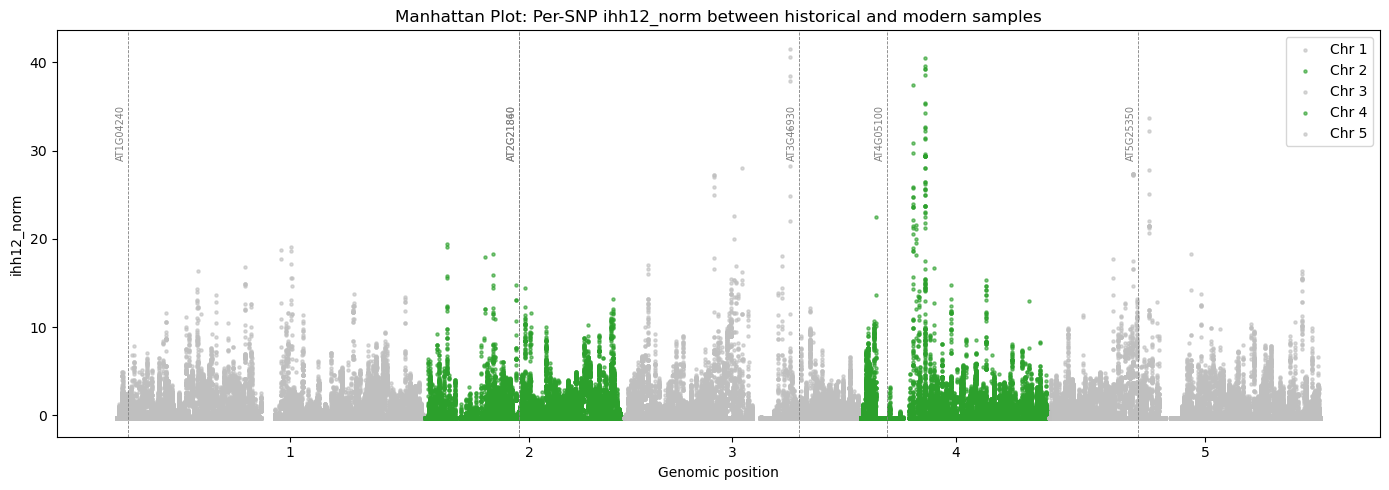

In [20]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['ihh12_norm'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {group.chrom.iloc[0]}')
plt.legend().remove() 


# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()

plt.xticks(ticks=xticks, labels=xtick_labels)
plt.xlabel('Genomic position')
plt.ylabel('ihh12_norm')
plt.title('Manhattan Plot: Per-SNP ihh12_norm between historical and modern samples')
plt.legend()
plt.tight_layout()

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    # Compute gene center
    gene_center = (gene_start + gene_ends) // 2

    # Subset df by chromosome
    subset = df[df['chrom'] == chrom]

    # Find the nearest position to the gene center
    nearest_idx = (subset['pos'] - gene_center).abs().idxmin()
    gene_pos_cum = subset.loc[nearest_idx, 'pos_cum']

    # Plot vertical line at gene
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['ihh12_norm'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')


plt.show()

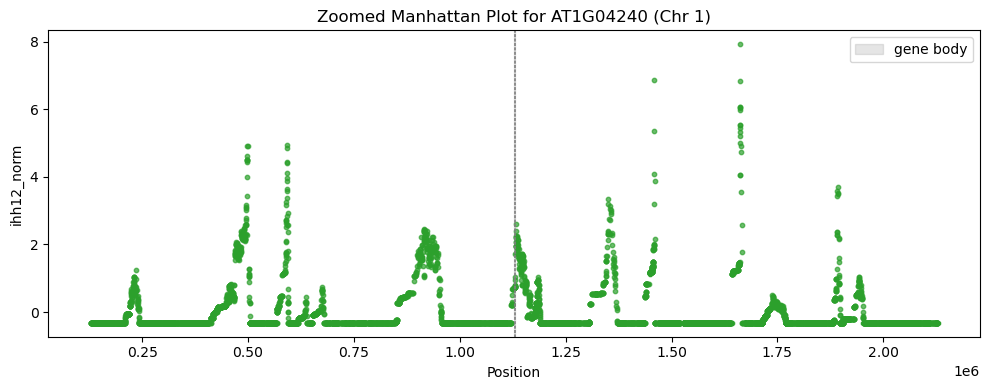

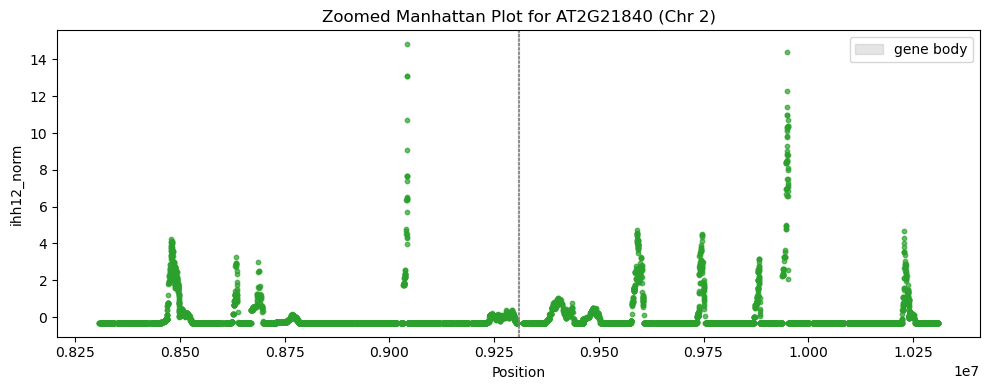

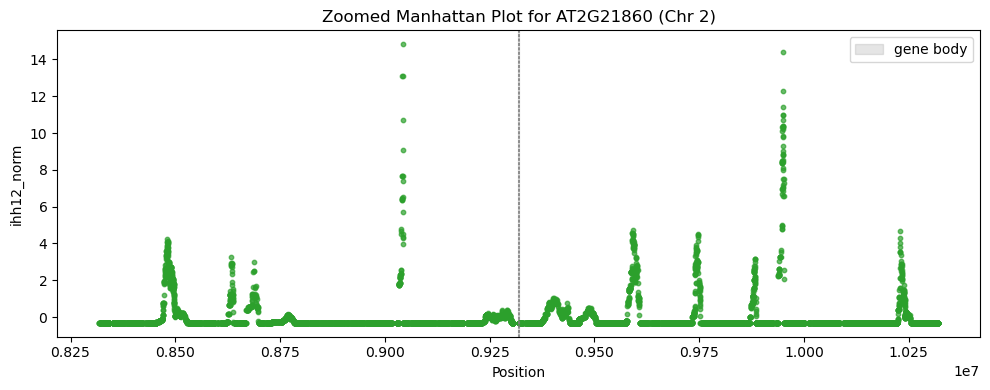

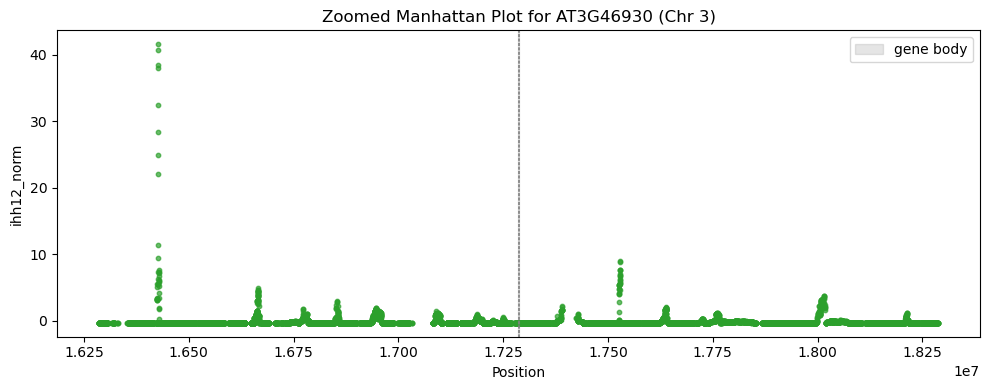

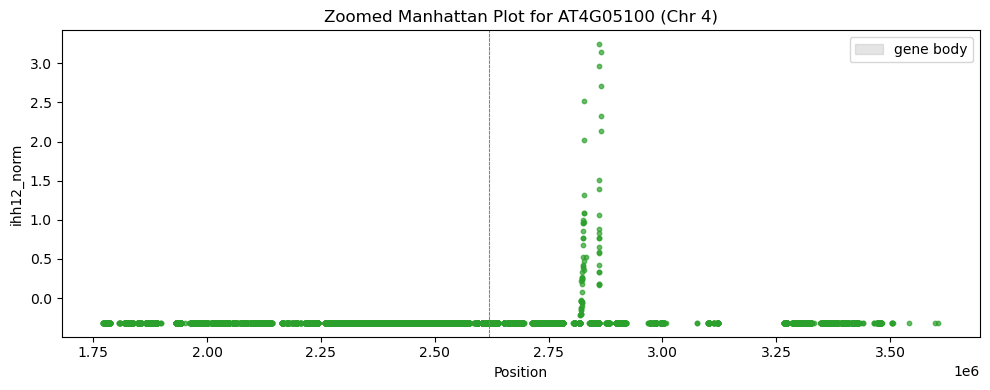

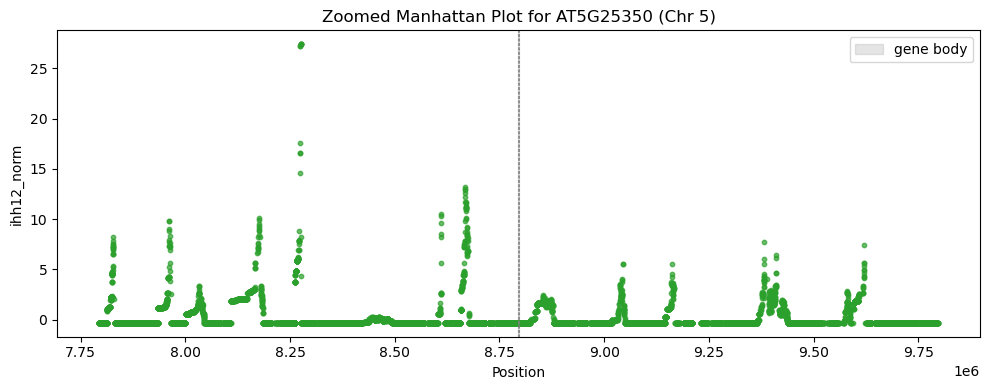

In [21]:
import matplotlib.pyplot as plt

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    
    # Filter region: ±5kb around gene
    region_df = df[(df['chrom'] == chrom) & (df['pos'] >= gene_start - 1000000) & (df['pos'] <= gene_end + 1000000)]

    if region_df.empty:
        continue  # Skip if no data in region

    plt.figure(figsize=(10, 4))

    # Manhattan-style scatter
    plt.scatter(region_df['pos'], region_df['ihh12_norm'], s=10, alpha=0.7, color='#2ca02c')
    
    # Gene region highlight
    plt.axvspan(gene_start, gene_end, color='grey', alpha=0.2, label='gene body')
    plt.axvline(gene_start, color='grey', linestyle='--', linewidth=0.6)
    plt.axvline(gene_end, color='grey', linestyle='--', linewidth=0.6)

    # Plot labels
    plt.title(f'Zoomed Manhattan Plot for {gene_id} (Chr {chrom})')
    plt.xlabel('Position')
    plt.ylabel('ihh12_norm')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [22]:
import glob

# Get all files in the current directory that contain 'ihh12' and end in '.out'
pi_out_files = glob.glob("selscan_maf01*pi.100bp.out")

# Preview list
print(pi_out_files)

['selscan_maf01_chr5_pi.pi.100bp.out', 'selscan_maf01_chr4_pi.pi.100bp.out', 'selscan_maf01_chr2_pi.pi.100bp.out', 'selscan_maf01_chr3_pi.pi.100bp.out', 'selscan_maf01_chr1_pi.pi.100bp.out']


In [23]:
pi_out_files

['selscan_maf01_chr5_pi.pi.100bp.out',
 'selscan_maf01_chr4_pi.pi.100bp.out',
 'selscan_maf01_chr2_pi.pi.100bp.out',
 'selscan_maf01_chr3_pi.pi.100bp.out',
 'selscan_maf01_chr1_pi.pi.100bp.out']

In [31]:
# Read and concatenate them
dfs = []
for f in pi_out_files:
    df = pd.read_csv(f, delim_whitespace=True, header=None)
    
    # Optionally add a chromosome identifier if needed
    chrom_num = f.split('_chr')[1].split('_')[0]
    df['chrom'] = int(chrom_num)
    
    dfs.append(df)

# Combine into one DataFrame
pi_df = pd.concat(dfs, ignore_index=True)


In [32]:
pi_df.columns = ['window_start', 'window_end', 'pi', 'chrom']

In [33]:
# First, sort by chromosome and window_start
pi_df = pi_df.sort_values(['chrom', 'window_start'])

# Get chromosome lengths
chrom_max = pi_df.groupby('chrom')['window_end'].max().sort_index()

# Compute chromosome offsets
chrom_offsets = chrom_max.cumsum() - chrom_max
offset_dict = chrom_offsets.to_dict()

# Apply offset
pi_df['pos_cum'] = pi_df.apply(lambda row: row['window_start'] + offset_dict[row['chrom']], axis=1)


In [34]:
from scipy.stats import zscore
pi_df['pi_z'] = zscore(pi_df['pi'])

In [ ]:
pi_df.to_csv('pi_all_maf01.csv',index=None)

In [36]:
df = pi_df.copy()

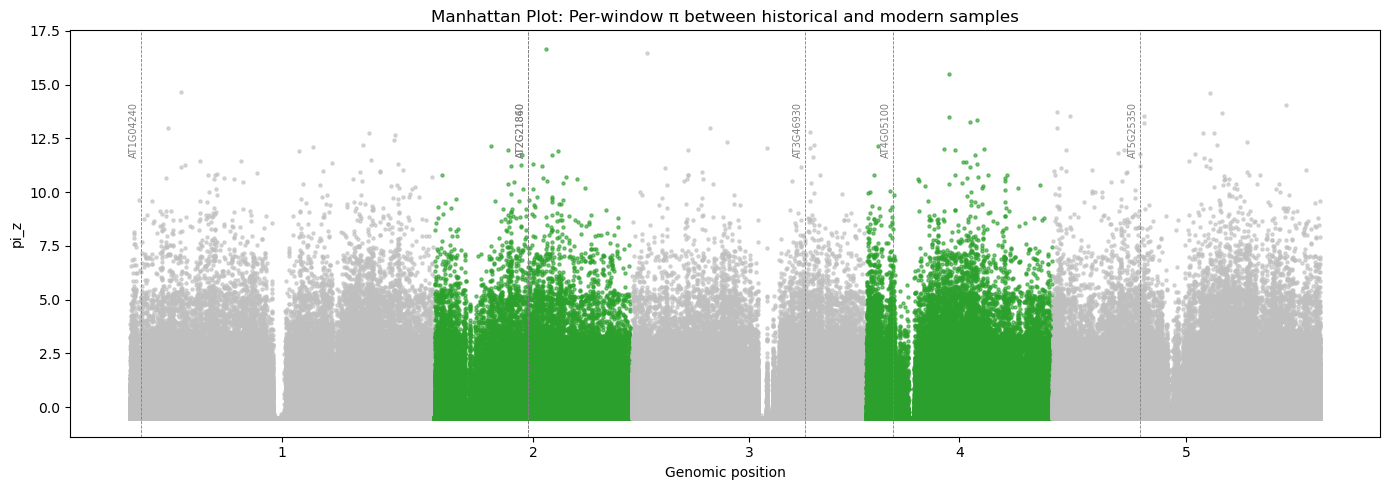

In [37]:
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

# Scatter plot of pi_z by chromosome
for i, (chrom, group) in enumerate(df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['pi_z'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {chrom}')
plt.legend().remove()

# Chromosome ticks
xticks = df.groupby('chrom')['pos_cum'].median()
xtick_labels = df.groupby('chrom')['chrom'].first()
plt.xticks(ticks=xticks, labels=xtick_labels)

plt.xlabel('Genomic position')
plt.ylabel('pi_z')
plt.title('Manhattan Plot: Per-window π between historical and modern samples')
plt.tight_layout()

# Annotate gene locations
for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_ends = row['end']
    gene_id = row['gene_id']

    # Compute gene center
    gene_center = (gene_start + gene_ends) // 2

    # Subset df by chromosome
    subset = df[df['chrom'] == chrom]

    # Find the nearest position to the gene center
    nearest_idx = (subset['window_start'] - gene_center).abs().idxmin()
    gene_pos_cum = subset.loc[nearest_idx, 'pos_cum']

    # Plot vertical line at gene
    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)

    # Add gene label
    plt.text(gene_pos_cum - 7e5, df['pi_z'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')

plt.show()


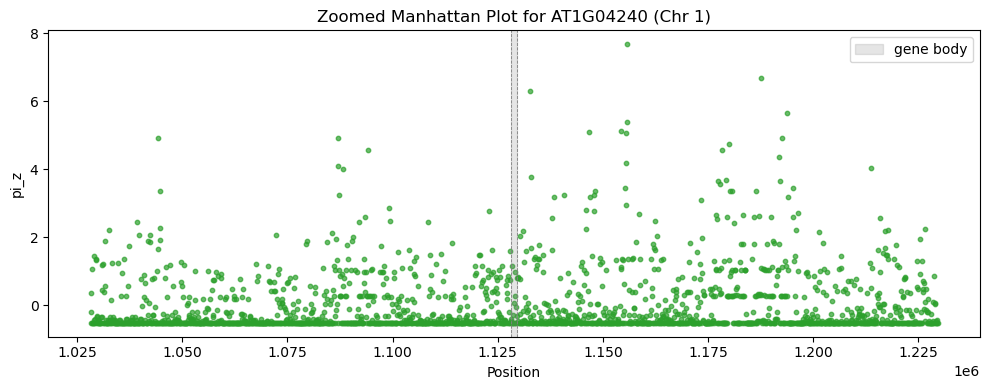

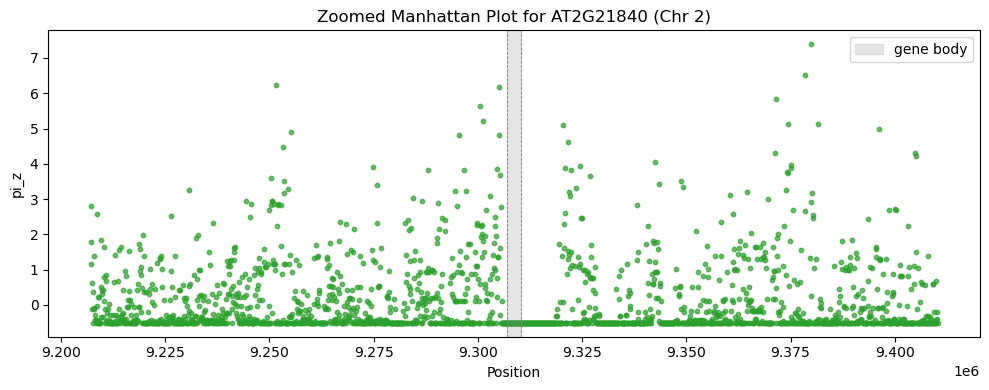

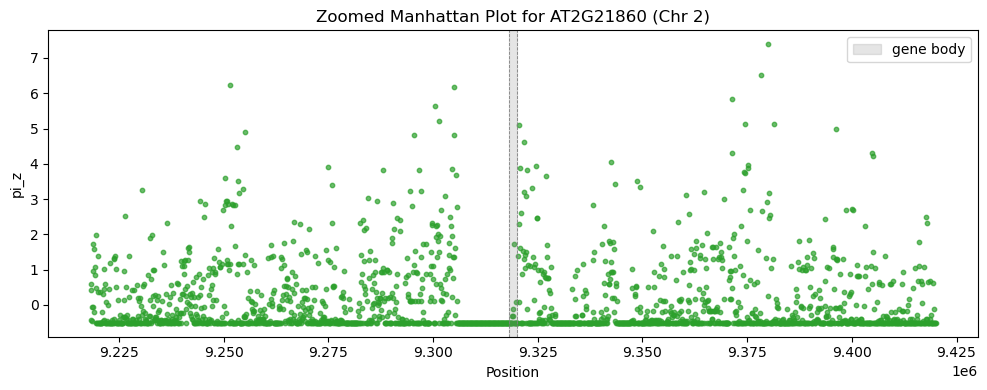

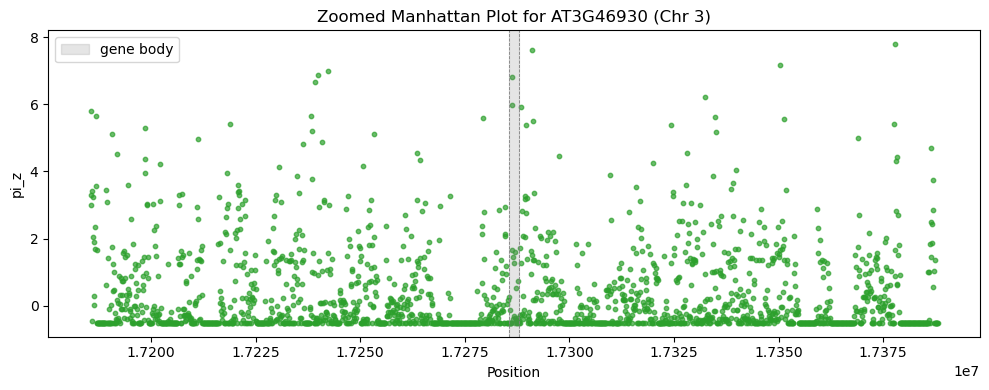

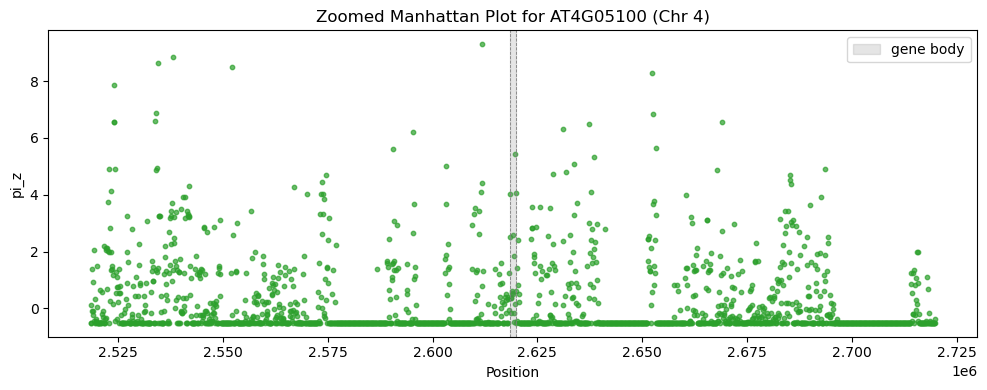

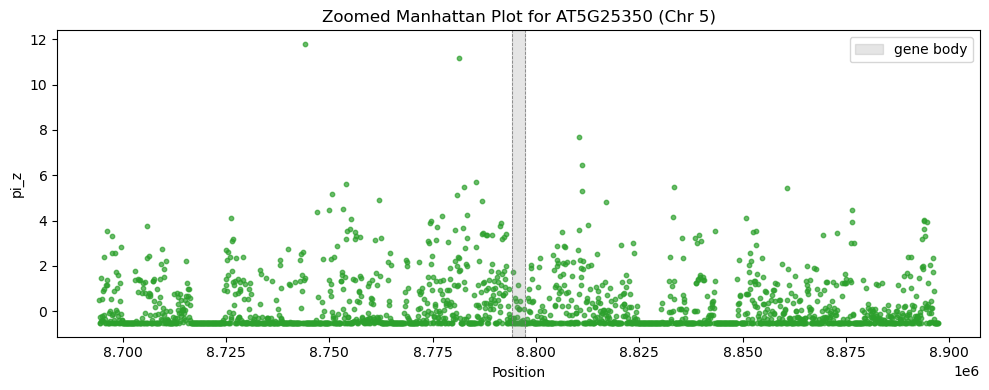

In [45]:
import matplotlib.pyplot as plt

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    
    # Filter region: ±5kb around gene
    region_df = df[(df['chrom'] == chrom) & (df['window_start'] >= gene_start - 100000) & (df['window_start'] <= gene_end + 100000)]

    if region_df.empty:
        continue  # Skip if no data in region

    plt.figure(figsize=(10, 4))

    # Manhattan-style scatter
    plt.scatter(region_df['window_start'], region_df['pi_z'], s=10, alpha=0.7, color='#2ca02c')
    
    # Gene region highlight
    plt.axvspan(gene_start, gene_end, color='grey', alpha=0.2, label='gene body')
    plt.axvline(gene_start, color='grey', linestyle='--', linewidth=0.6)
    plt.axvline(gene_end, color='grey', linestyle='--', linewidth=0.6)

    # Plot labels
    plt.title(f'Zoomed Manhattan Plot for {gene_id} (Chr {chrom})')
    plt.xlabel('Position')
    plt.ylabel('pi_z')
    plt.legend()
    plt.tight_layout()
    plt.show()


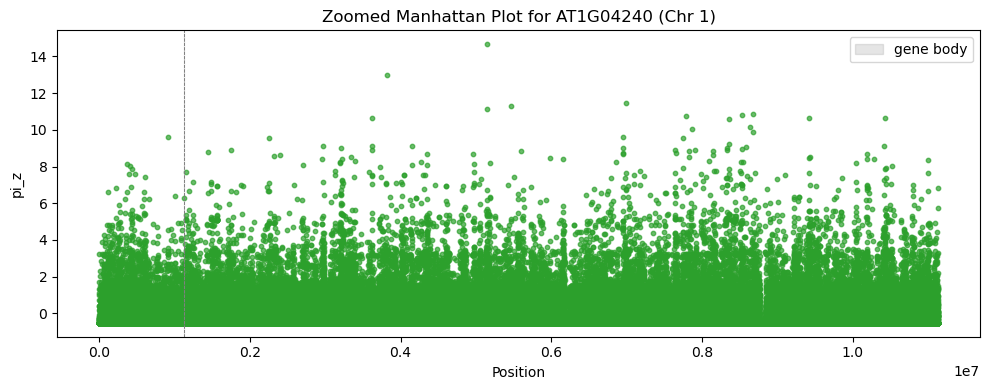

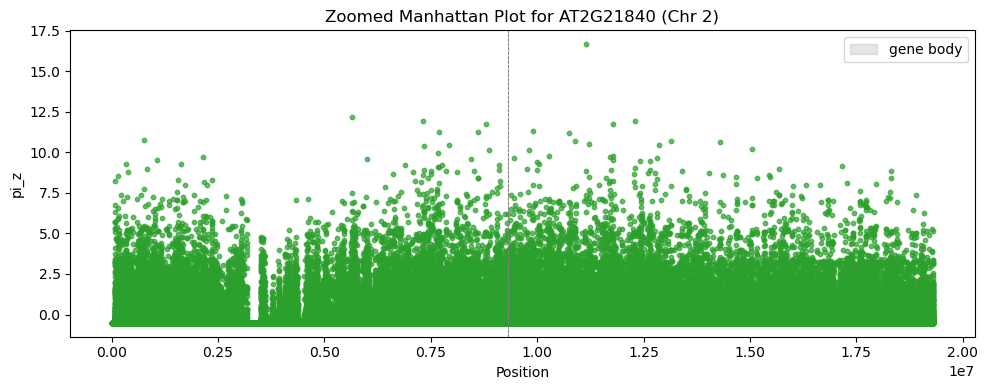

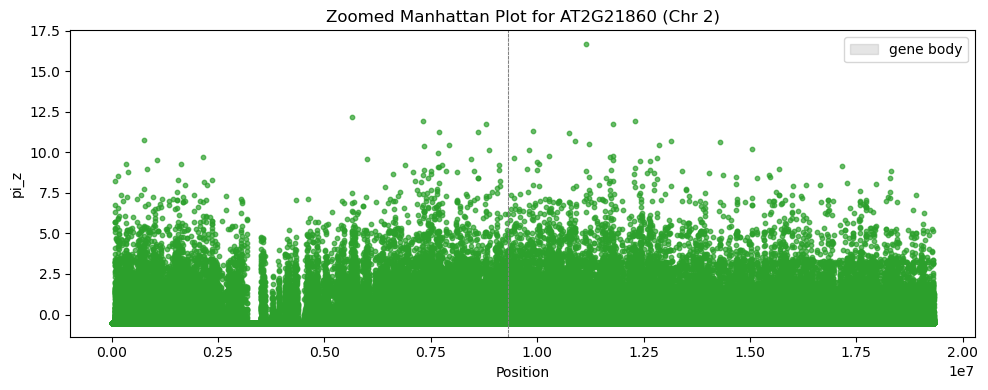

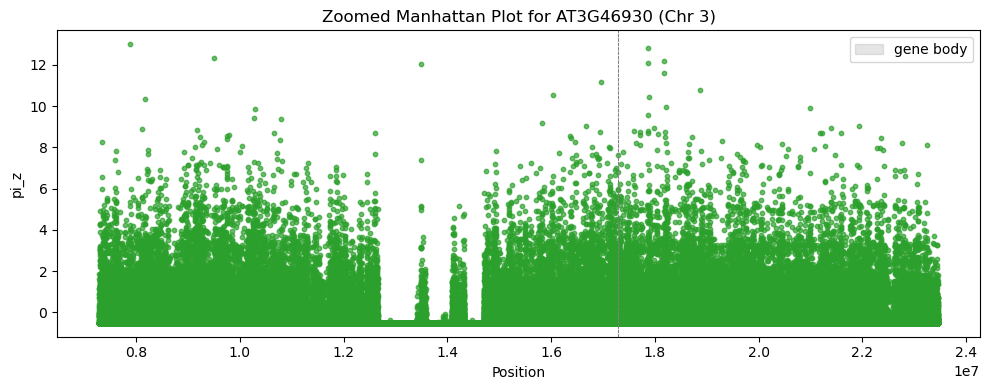

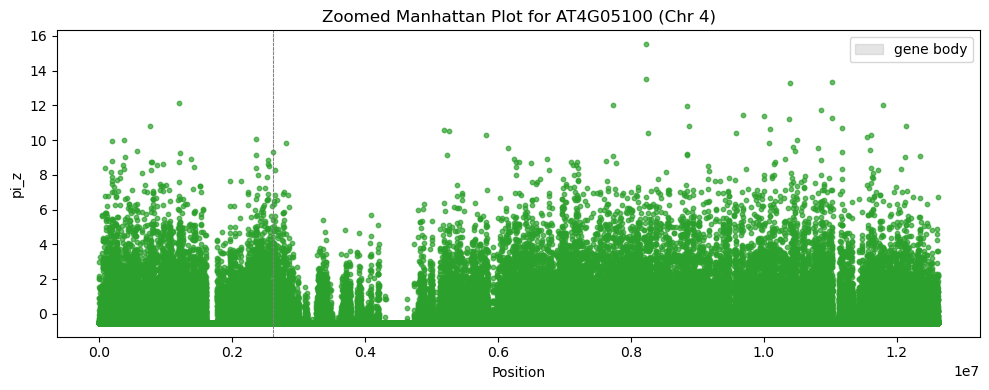

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


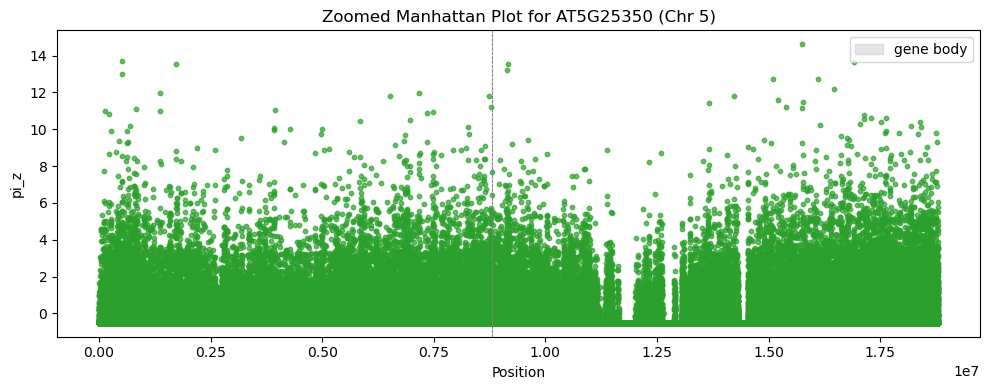

In [44]:
import matplotlib.pyplot as plt

for _, row in gene_df.iterrows():
    chrom = row['chrom']
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    
    # Filter region: ±5kb around gene
    region_df = df[(df['chrom'] == chrom) & (df['window_start'] >= gene_start - 10000000) & (df['window_start'] <= gene_end + 10000000)]

    if region_df.empty:
        continue  # Skip if no data in region

    plt.figure(figsize=(10, 4))

    # Manhattan-style scatter
    plt.scatter(region_df['window_start'], region_df['pi_z'], s=10, alpha=0.7, color='#2ca02c')
    
    # Gene region highlight
    plt.axvspan(gene_start, gene_end, color='grey', alpha=0.2, label='gene body')
    plt.axvline(gene_start, color='grey', linestyle='--', linewidth=0.6)
    plt.axvline(gene_end, color='grey', linestyle='--', linewidth=0.6)

    # Plot labels
    plt.title(f'Zoomed Manhattan Plot for {gene_id} (Chr {chrom})')
    plt.xlabel('Position')
    plt.ylabel('pi_z')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [39]:
## lets zoom in into the genes in chromosome 2 since i see a valley 

In [40]:
gene_center = (gene_start + gene_ends) // 2

# Subset just the chromosome
subset = df[df['chrom'] == chrom]

# Get the index of the nearest position
nearest_idx = (subset['pos_cum'] - gene_center).abs().idxmin()

# Retrieve the corresponding pos_cum
gene_pos_cum = subset.loc[nearest_idx, 'pos_cum']


/tmp/ipykernel_3938685/324585045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2
/tmp/ipykernel_3938685/324585045.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['distance'] = region_df['pos'] - gene_center
/tmp/ipykernel_3938685/324585045.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

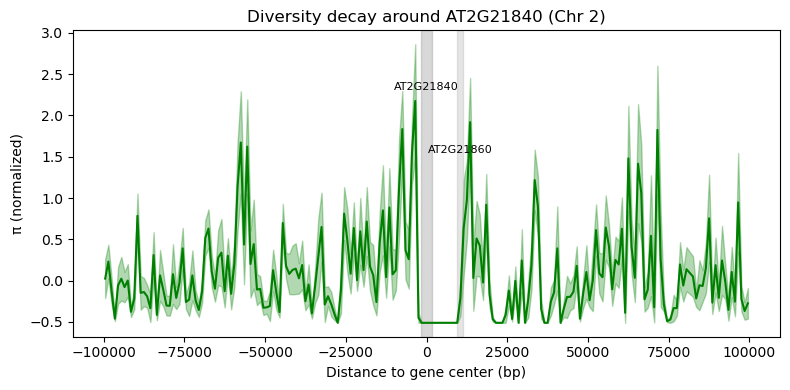

In [46]:
chrom = 2
gene_start = 9307024
gene_end = 9310358


# Filter region: ±5kb around gene
region_df = pi_df[(pi_df['chrom'] == chrom) & (pi_df['window_start'] >= gene_start - 1000000) & (pi_df['window_start'] <= gene_end + 1000000)]


region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2



gene_center = (gene_start + gene_end) // 2

# Add distance from gene center
region_df['distance'] = region_df['pos'] - gene_center

# Bin data for SEM calculation
region_df['bin'] = pd.cut(region_df['distance'], bins=np.arange(-100000, 100001, 1000))
binned = region_df.groupby('bin')['pi_z'].agg(['mean', 'sem']).reset_index()
binned['center'] = binned['bin'].apply(lambda x: x.mid)


# Plot
plt.figure(figsize=(8, 4))
plt.plot(binned['center'], binned['mean'], color='green', label='Mean π (normalized)')
plt.fill_between(binned['center'], binned['mean'] - binned['sem'], binned['mean'] + binned['sem'],
                 alpha=0.3, color='green', label='±1 SEM')

# Gene positions
gene1_start, gene1_end = 9307024, 9310358
gene2_start, gene2_end = 9318122, 9320024
gene1_center = (gene1_start + gene1_end) // 2

# Add gene spans using same reference point
plt.axvspan(gene1_start - gene1_center, gene1_end - gene1_center, color='grey', alpha=0.3)
plt.axvspan(gene2_start - gene1_center, gene2_end - gene1_center, color='darkgrey', alpha=0.3)

# Add labels on top of the shaded boxes
plt.text((gene1_start + gene1_end) / 2 - gene1_center, max(binned['mean']) * 1.05, 'AT2G21840',
         ha='center', va='bottom', fontsize=8, color='black')
plt.text((gene2_start + gene2_end) / 2 - gene1_center, max(binned['mean']) * 0.7, 'AT2G21860',
         ha='center', va='bottom', fontsize=8, color='black')

# Final plot settings
plt.xlabel('Distance to gene center (bp)')
plt.ylabel('π (normalized)')
plt.title('Diversity decay around AT2G21840 (Chr 2)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_3938685/1837699095.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2
/tmp/ipykernel_3938685/1837699095.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['distance'] = region_df['pos'] - gene_center
/tmp/ipykernel_3938685/1837699095.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

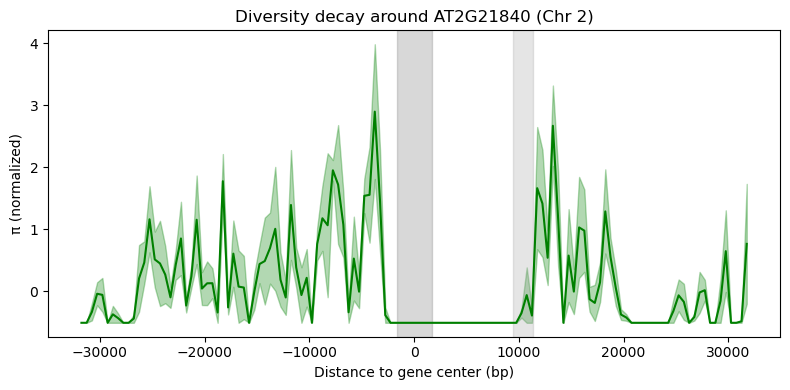

In [47]:
chrom = 2
gene_start = 9307024
gene_end = 9310358


# Filter region: ±5kb around gene
region_df = pi_df[(pi_df['chrom'] == chrom) & (pi_df['window_start'] >= gene_start - 30000) & (pi_df['window_start'] <= gene_end + 30000)]


region_df['pos'] = (region_df['window_start'] + region_df['window_end']) // 2



gene_center = (gene_start + gene_end) // 2

# Add distance from gene center
region_df['distance'] = region_df['pos'] - gene_center

# Bin data for SEM calculation
region_df['bin'] = pd.cut(region_df['distance'], bins=np.arange(-100000, 100001, 500))
binned = region_df.groupby('bin')['pi_z'].agg(['mean', 'sem']).reset_index()
binned['center'] = binned['bin'].apply(lambda x: x.mid)


# Plot
plt.figure(figsize=(8, 4))
plt.plot(binned['center'], binned['mean'], color='green', label='Mean π (normalized)')
plt.fill_between(binned['center'], binned['mean'] - binned['sem'], binned['mean'] + binned['sem'],
                 alpha=0.3, color='green', label='±1 SEM')

# Gene positions
gene1_start, gene1_end = 9307024, 9310358
gene2_start, gene2_end = 9318122, 9320024
gene1_center = (gene1_start + gene1_end) // 2

# Add gene spans using same reference point
plt.axvspan(gene1_start - gene1_center, gene1_end - gene1_center, color='grey', alpha=0.3)
plt.axvspan(gene2_start - gene1_center, gene2_end - gene1_center, color='darkgrey', alpha=0.3)

# Add labels on top of the shaded boxes
plt.text((gene1_start + gene1_end) / 2 - gene1_center, max(binned['mean']) * 1.05, 'AT2G21840',
         ha='center', va='bottom', fontsize=8, color='black')
plt.text((gene2_start + gene2_end) / 2 - gene1_center, max(binned['mean']) * 0.7, 'AT2G21860',
         ha='center', va='bottom', fontsize=8, color='black')

# Final plot settings
plt.xlabel('Distance to gene center (bp)')
plt.ylabel('π (normalized)')
plt.title('Diversity decay around AT2G21840 (Chr 2)')
plt.tight_layout()
plt.show()
